In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('vehicles.csv')

In [3]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category', 'manufacturer_med_price',
       'model_med_price', 'condition_med_price', 'paint_color_med_price',
       'state_med_price', 'title_status_med_price', 'fuel_med_price',
       'transmission_med_price', 'size_med_price', 'drive_med_price',
       'type_med_price', 'manufacturer_median_price', 'model_median_price',
       'condition_median_price', 'paint_color_median_price',
       'state_median_price', 'title_status_median_price', 'fuel_median_price',
       'transmission_median_price', 'size_median_price', 'drive_median_price',
       'type_median_price', 'manufacturer_count_price', 'model_count_price',
       'condition_count_price', 'paint_color_count_price'

In [4]:
data.head(5)

,id,url,region,region_url,year,manufacturer,model,condition,cylinders,fuel,...,model_count_price,condition_count_price,paint_color_count_price,state_count_price,title_status_count_price,fuel_count_price,transmission_count_price,size_count_price,drive_count_price,type_count_price
0,7106420290,https://roanoke.craigslist.org/cto/d/lynchburg...,roanoke,https://roanoke.craigslist.org,2010.0,ford,f-150,like new,8 cylinders,gas,...,8512.0,27592.0,80063.0,11115,412803.0,376312.0,387089.0,40304.0,59958.0,9963.0
1,7115677666,https://hudsonvalley.craigslist.org/ctd/d/rens...,hudson valley,https://hudsonvalley.craigslist.org,2012.0,ram,1500,excellent,NaN,gas,...,4690.0,118422.0,30346.0,16921,412803.0,376312.0,387089.0,NaN,142694.0,40930.0
2,7111456955,https://saltlakecity.craigslist.org/ctd/d/kent...,salt lake city,https://saltlakecity.craigslist.org,2017.0,ram,1500 sport,NaN,8 cylinders,gas,...,96.0,NaN,NaN,1540,412803.0,376312.0,387089.0,NaN,142694.0,NaN
3,7106985966,https://odessa.craigslist.org/cto/d/odessa-201...,odessa / midland,https://odessa.craigslist.org,2015.0,chrysler,200,excellent,4 cylinders,gas,...,897.0,118422.0,59698.0,24507,11648.0,376312.0,387089.0,40304.0,111130.0,NaN
4,7109093373,https://onslow.craigslist.org/ctd/d/raleigh-20...,jacksonville,https://onslow.craigslist.org,2011.0,honda,accord,NaN,NaN,gas,...,3303.0,NaN,59698.0,17065,412803.0,376312.0,387089.0,75430.0,NaN,79905.0


In [5]:
data.title_status.value_counts()

clean         412803
rebuilt        11648
salvage         5572
lien            2857
missing          763
parts only       290
Name: title_status, dtype: int64

In [6]:
data.type.value_counts()

SUV            80144
sedan          79905
pickup         40930
truck          39506
coupe          17404
other          12866
hatchback      12396
van             9963
wagon           9897
convertible     8592
mini-van        5906
offroad          650
bus              528
Name: type, dtype: int64

In [7]:
data['size'].value_counts()

full-size      75430
mid-size       40304
compact        20906
sub-compact     3224
Name: size, dtype: int64

In [48]:
''' Use different column names to split data and get median price from those columns, but made to get any value from any data'''
# @params 
# g is a dataframe

def get_group_value(data, group, operation, value):
    
    g = data.get_group(group)
    struct = dict()
    if operation == 'median':
        struct[group] = np.median(g[value]) # could cause error with None Types
    elif operation == 'count':
        struct[group] = g.shape[0]
    return round(struct[group], 2)

In [33]:
man = data.manufacturer.value_counts()

In [39]:
man.head()['ford']

78250

In [10]:
x = pd.DataFrame(data.manufacturer.value_counts())

In [11]:
x.index

Index(['ford', 'chevrolet', 'toyota', 'nissan', 'honda', 'ram', 'jeep', 'gmc',
       'dodge', 'bmw', 'hyundai', 'subaru', 'volkswagen', 'mercedes-benz',
       'kia', 'chrysler', 'cadillac', 'lexus', 'buick', 'mazda', 'audi',
       'acura', 'infiniti', 'lincoln', 'pontiac', 'volvo', 'mitsubishi',
       'mini', 'rover', 'mercury', 'saturn', 'fiat', 'jaguar', 'tesla',
       'harley-davidson', 'ferrari', 'datsun', 'alfa-romeo', 'aston-martin',
       'porche', 'land rover', 'morgan'],
      dtype='object')

In [12]:
y = list(x.index)

In [13]:
data.manufacturer.value_counts().index

Index(['ford', 'chevrolet', 'toyota', 'nissan', 'honda', 'ram', 'jeep', 'gmc',
       'dodge', 'bmw', 'hyundai', 'subaru', 'volkswagen', 'mercedes-benz',
       'kia', 'chrysler', 'cadillac', 'lexus', 'buick', 'mazda', 'audi',
       'acura', 'infiniti', 'lincoln', 'pontiac', 'volvo', 'mitsubishi',
       'mini', 'rover', 'mercury', 'saturn', 'fiat', 'jaguar', 'tesla',
       'harley-davidson', 'ferrari', 'datsun', 'alfa-romeo', 'aston-martin',
       'porche', 'land rover', 'morgan'],
      dtype='object')

In [14]:
def add_column(data, variable, column_name, struct):
    
    # variable is manufacturer for first one
    column = create_data(data[variable], struct) # creates the list which will become the column
    
    '''
    if column_name == 'manufacturer':
        column = add_manufacturers(data.manufacturer, struct)
    elif column_name == 'model':
        column = add_models(data.models)
    elif column_name == 'condition':
        column = add_conditions(data.conditions)
    elif column_name == 'state':
        column = add_states(data.state)
    elif column_name == 'title':
        column = add_titles(data.title)
    elif column_name == 'fuel':
        column = add_fuel(data.fuel)
    elif column_name == 'transmission':
        column = add_transmission(data.transmission)
    elif column_name == 'size':
        column = add_size(data.size)
    elif column_name == 'drive':
        column = add_drive(data.drive)
    elif column_name == 'type':
        column = add_type(data.type)
    '''
    
    data[column_name] = column    

In [15]:
def create_data(data, struct):
    
    column_values = list(data) # all the manufacturer values
    out = list(range(0, len(column_values)))
    i = 0
    for value in column_values:
        if value is None:
            i += 1
            continue
        try:
            out[i] = struct[value]
        except:
            out[i] = None
        i += 1
        
    return out

In [16]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category'],
      dtype='object')

In [49]:
'''
columns = ['manufacturer', 'model', 'condition', 'paint_color', 'state', 'title_status', 'fuel', 'transmission', 'size', 'drive', 'type']
operations = ['median','count']

for operation in operations:
    print('Operation')
    for column in columns:
        print('Column: ' + column)
        # get all the unique values for a certain column
        unique_values = list(data[column].value_counts().index) 
        # grab the data segment for that column
        struct = dict()
        col_data = data.groupby(column)
        for unique_value in unique_values:
            if unique_value is None:
                continue
        # for every unique value in the specific column find the median price for the reselting data segment
            struct[unique_value] = get_group_value(col_data, unique_value, operation,'price')
        column_name = column + '_' + operation + '_' + 'price'
    # adds a new column to the original dataset
        add_column(data, column, column_name, struct)
    '''

Operation
Column: manufacturer
Column: model
Column: condition
Column: paint_color
Column: state
Column: title_status
Column: fuel
Column: transmission
Column: size
Column: drive
Column: type
Operation
Column: manufacturer
Column: model
Column: condition
Column: paint_color
Column: state
Column: title_status
Column: fuel
Column: transmission
Column: size
Column: drive
Column: type


In [50]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'is_expensive', 'age', 'age_category', 'manufacturer_med_price',
       'model_med_price', 'condition_med_price', 'paint_color_med_price',
       'state_med_price', 'title_status_med_price', 'fuel_med_price',
       'transmission_med_price', 'size_med_price', 'drive_med_price',
       'type_med_price', 'manufacturer_median_price', 'model_median_price',
       'condition_median_price', 'paint_color_median_price',
       'state_median_price', 'title_status_median_price', 'fuel_median_price',
       'transmission_median_price', 'size_median_price', 'drive_median_price',
       'type_median_price', 'manufacturer_count_price', 'model_count_price',
       'condition_count_price', 'paint_color_cou

In [52]:
data.loc[0,'manufacturer']

'jeep'

In [53]:
data['manufacturer'].value_counts()['jeep']

19699

In [54]:
data.loc[0,'manufacturer_count_price']

19699.0

In [55]:
data.to_csv(index=False)

MemoryError: 

In [56]:
data.shape

(435734, 61)

In [58]:
from sklearn.utils import shuffle

In [60]:
 data = shuffle(data)

In [63]:
y = data['price']
data.drop(['price'], axis=1, inplace=True)

C:\Users\NikhilGaur\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
data.price

AttributeError: 'DataFrame' object has no attribute 'price'

In [70]:
X_train, X_tune, y_train, y_tune = train_test_split(data, y, test_size=0.30, random_state=42)

In [71]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_tune.to_csv('X_tune.csv', index=False)
y_tune.to_csv('y_tune.csv', index=False)

In [72]:
X_tune, y_tune, X_test, y_test = train_test_split(X_tune, y_tune, test_size=0.33, random_state=42)

In [73]:
X_tune.to_csv('X_tune.csv', index=False)
y_tune.to_csv('y_tune.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [75]:
data.to_csv('vehicles.csv', index=False)

In [84]:
type(y)

pandas.core.series.Series

In [85]:
data['price'] = list(y)

In [86]:
data.price

46831     12888
178047    19997
128034    27900
366448     6800
82435      7750
          ...  
146508     7996
392951    22900
95507      7900
406369    29000
254071    13970
Name: price, Length: 435734, dtype: int64

In [87]:
corr = data.corr()

In [80]:
corr.head()

,id,year,odometer,county,lat,long,age,manufacturer_med_price,model_med_price,condition_med_price,...,model_count_price,condition_count_price,paint_color_count_price,state_count_price,title_status_count_price,fuel_count_price,transmission_count_price,size_count_price,drive_count_price,type_count_price
id,1.000000,-0.021674,0.007029,NaN,-0.050956,-0.108738,0.021674,-0.028976,-0.045883,-0.000916,...,-0.004787,-0.013999,-0.012279,0.093334,-0.006575,0.018071,0.023289,-0.026370,-0.023858,0.028650
year,-0.021674,1.000000,-0.244137,NaN,-0.003259,-0.024716,-1.000000,0.024846,0.127707,0.212285,...,0.071619,0.042401,0.152468,-0.005670,-0.013774,-0.037788,0.161643,-0.050913,0.225693,0.111682
odometer,0.007029,-0.244137,1.000000,NaN,0.003892,0.037358,0.244137,0.001455,-0.102276,-0.120629,...,0.020220,0.010487,-0.015510,-0.016503,0.032322,-0.058885,0.028702,0.067120,0.012785,0.006574
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.050956,-0.003259,0.003892,NaN,1.000000,-0.166066,0.003259,0.050787,0.021849,-0.035463,...,0.013199,0.020386,-0.035002,-0.335975,0.005394,0.004159,0.027767,0.049308,0.245499,0.035073


In [88]:
corr.price

id                          -0.044729
year                         0.210926
odometer                    -0.200183
county                            NaN
lat                          0.051121
long                        -0.100622
age                         -0.210926
manufacturer_med_price       0.283652
model_med_price              0.709068
condition_med_price          0.170668
paint_color_med_price        0.136475
state_med_price              0.170450
title_status_med_price       0.070325
fuel_med_price               0.245865
transmission_med_price       0.092997
size_med_price               0.188251
drive_med_price              0.296640
type_med_price               0.317623
manufacturer_median_price    0.283652
model_median_price           0.709068
condition_median_price       0.170668
paint_color_median_price     0.136475
state_median_price           0.170450
title_status_median_price    0.070325
fuel_median_price            0.245865
transmission_median_price    0.092997
size_median_

In [92]:
price_corr = list(abs(corr.price))

In [93]:
price_corr

[0.04472909374030203,
 0.2109258672252718,
 0.20018316620300292,
 nan,
 0.05112087367807357,
 0.10062150312623015,
 0.21092586722527285,
 0.2836521257561203,
 0.709067696745922,
 0.17066780759793687,
 0.1364749324795546,
 0.17044991877962387,
 0.07032502522342586,
 0.2458649268114987,
 0.09299741388228014,
 0.18825061915470467,
 0.29663957466245244,
 0.317622990962215,
 0.2836521257561203,
 0.709067696745922,
 0.17066780759793687,
 0.1364749324795546,
 0.17044991877962387,
 0.07032502522342586,
 0.2458649268114987,
 0.09299741388228014,
 0.18825061915470467,
 0.29663957466245244,
 0.317622990962215,
 0.08127803989246402,
 0.02237072885062251,
 0.0034629756326880635,
 0.10943986748092148,
 0.005387028337462605,
 0.030606911753087114,
 0.21020431447093935,
 0.0437316755581733,
 0.17908611401570626,
 0.1257838511523942,
 0.13417381993078495,
 1.0]

In [103]:
 max_indices = np.argsort(price_corr)[-7:]

In [104]:
max_indices

array([16, 28, 17, 19,  8, 40,  3], dtype=int64)

In [105]:
price_corr[8]

0.709067696745922

In [102]:
price_corr[3]

nan

In [110]:
type(corr)

pandas.core.frame.DataFrame

In [111]:
corr.columns

Index(['id', 'year', 'odometer', 'county', 'lat', 'long', 'age',
       'manufacturer_med_price', 'model_med_price', 'condition_med_price',
       'paint_color_med_price', 'state_med_price', 'title_status_med_price',
       'fuel_med_price', 'transmission_med_price', 'size_med_price',
       'drive_med_price', 'type_med_price', 'manufacturer_median_price',
       'model_median_price', 'condition_median_price',
       'paint_color_median_price', 'state_median_price',
       'title_status_median_price', 'fuel_median_price',
       'transmission_median_price', 'size_median_price', 'drive_median_price',
       'type_median_price', 'manufacturer_count_price', 'model_count_price',
       'condition_count_price', 'paint_color_count_price', 'state_count_price',
       'title_status_count_price', 'fuel_count_price',
       'transmission_count_price', 'size_count_price', 'drive_count_price',
       'type_count_price', 'price'],
      dtype='object')

In [115]:
for index in max_indices:
    print('Variable correlation value with best correlation:   ' + str(round(price_corr[index], 4)))    
    print('Variable names with best correlation:   ' + str(corr.columns[index]))
    print()

Variable correlation value with best correlation:   0.2966
Variable names with best correlation:   drive_med_price

Variable correlation value with best correlation:   0.3176
Variable names with best correlation:   type_median_price

Variable correlation value with best correlation:   0.3176
Variable names with best correlation:   type_med_price

Variable correlation value with best correlation:   0.7091
Variable names with best correlation:   model_median_price

Variable correlation value with best correlation:   0.7091
Variable names with best correlation:   model_med_price

Variable correlation value with best correlation:   1.0
Variable names with best correlation:   price

Variable correlation value with best correlation:   nan
Variable names with best correlation:   county



In [116]:
remove_columns = ['manufacturer_med_price', 'model_med_price', 'condition_med_price', 'paint_color_med_price', 'state_med_price', 'title_status_med_price', 'fuel_med_price', 'transmission_med_price', 'size_med_price', 'drive_med_price', 'type_med_price']

In [117]:
data.drop(remove_columns, axis=1, inplace=True)

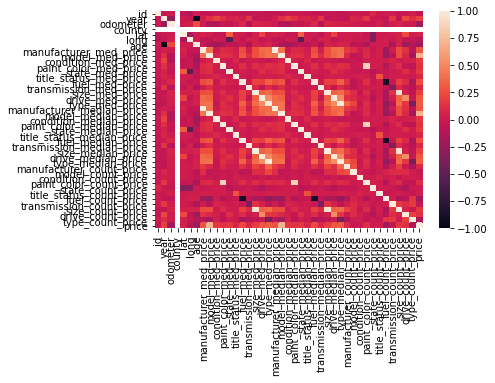

In [118]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [120]:
corr = data.corr()
price_corr = list(abs(corr.price))
max_indices = np.argsort(price_corr)[-7:]
for index in max_indices:
    print('Variable correlation value with best correlation:   ' + str(round(price_corr[index], 4)))    
    print('Variable names with best correlation:   ' + str(corr.columns[index]))
    print()

Variable correlation value with best correlation:   0.2459
Variable names with best correlation:   fuel_median_price

Variable correlation value with best correlation:   0.2837
Variable names with best correlation:   manufacturer_median_price

Variable correlation value with best correlation:   0.2966
Variable names with best correlation:   drive_median_price

Variable correlation value with best correlation:   0.3176
Variable names with best correlation:   type_median_price

Variable correlation value with best correlation:   0.7091
Variable names with best correlation:   model_median_price

Variable correlation value with best correlation:   1.0
Variable names with best correlation:   price

Variable correlation value with best correlation:   nan
Variable names with best correlation:   county



In [ ]:
# The model, type, drive, manufacturer, and fuel have the best correlations with the overall price of a car,
# I would be very wary of model price, the correlation factor is WAAAY too high

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import datetime

In [ ]:
data.columns

In [ ]:
data.loc[0,:]

In [ ]:
data.loc[0,'size']

In [ ]:
data.loc[0,'drive']

In [ ]:
# check code to see if it works

In [ ]:
data.loc[0,'manufacturer']

In [ ]:
np.median(data.groupby('manufacturer').get_group('jeep')['price'])

In [66]:
data.loc[0,'manufacturer_med_price']

12995.0

In [67]:
data.loc[0,'drive']

nan

In [68]:
man_median_price

{}

In [69]:
row['manufacturer']

NameError: name 'row' is not defined

In [ ]:
manufacturers = list(data['manufacturer'])

In [ ]:
def add_new_columns(l, values):
    
    error = 0
    z = list()
    for i in l:
        try:
            z.append(values[i]) 
        except:
            error += 1
            z.append(None)
            
    print('Num Missing: ' + str(error))
    return z

In [ ]:
data['man_med_price'] = add_new_columns(manufacturers, man_median_price)

In [ ]:
'''
err_man = 0
z = list()
index = 0
for i in manufacturers:
    if index % 100 == 0 and index > 0:
        print('Row: ' + str(index))
    try:
        z.append(man_median_price[i]) 
    except:
        err_man += 1
        z.append(None)
    index += 1
print('Num Missing Manufacturers: ' + str(err_man))
'''    

In [ ]:
data['man_med_price'] = z

In [ ]:
data.man_med_price

In [ ]:
data.corr()

In [ ]:
data.model

In [ ]:
err_man = 0
z = list()
for index, row in data.iterrows():
    if index % 100 == 0 and index > 0:
        print('Row: ' + str(index))
    man = row['manufacturer']
    try:
        z.append(man_median_price[man]) 
    except:
        err_man += 1
print('Num Missing Manufacturers: ' + str(err_man))